In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
from cnn_utils import *

%matplotlib inline
np.random.seed(1)

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

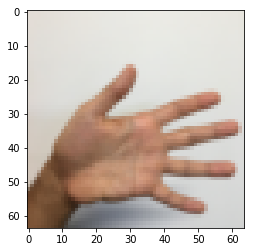

y = 5


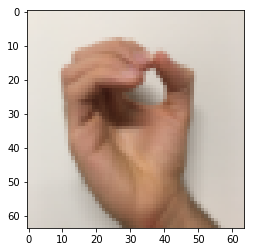

y = 0


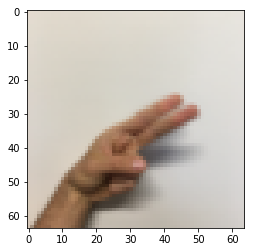

y = 2


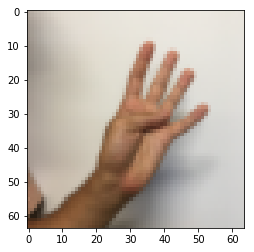

y = 4


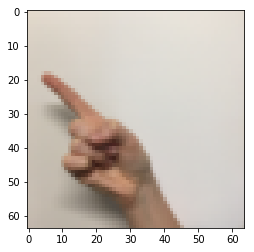

y = 1


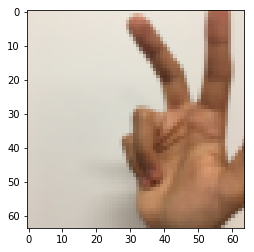

y = 3


In [4]:
check = 0
alredyShowed = []
index = 0
while (len(alredyShowed) <= 5):
    Y = Y_train_orig[:,index][0]
#     print Y
#     print alredyShowed
    if ((Y in alredyShowed)== False):
        plt.imshow(X_train_orig[index])
        plt.show()
        print ("y = " + str(np.squeeze(Y_train_orig[:, index])))
        alredyShowed.append(Y)
#         print index
    index = index + 1
        

    
    

In [5]:
Y_train_orig.shape

(1, 1080)

In [6]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
conv_layers = {}

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [7]:
def create_placeholder(n_H0,n_W0,n_C0,n_Y):
    X = tf.placeholder(tf.float32, shape = [None, n_H0, n_W0, n_C0])
    Y = tf.placeholder(tf.float32, shape = [None , n_Y])
    return X, Y

In [8]:
X , Y = create_placeholder(64,64,3,6)

In [9]:
print X
print Y

Tensor("Placeholder:0", shape=(?, 64, 64, 3), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 6), dtype=float32)


In [14]:
def initialize_parameter():
    tf.set_random_seed(1)
    
    W1 = tf.get_variable('W1', [4,4,3,8], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    
    W2 = tf.get_variable('W2', [2,2,8,16], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    
    parameters = {"W1" : W1,
                  "W2" : W2}
    return parameters

In [15]:
tf.reset_default_graph()
with tf.Session() as sess_test:
    parameters = initialize_parameter()
    init = tf.global_variables_initializer()
    sess_test.run(init)
    print ("W1 =" + str(parameters["W1"].eval()))
    print ("W2 =" + str(parameters["W2"].eval()))

W1 =[[[[ 0.11547081 -0.15562162  0.14463945 -0.12213563 -0.161331
     0.0167321   0.00137798  0.15687598]
   [ 0.06261188  0.15809353 -0.13944083  0.1304368   0.14947264
     0.07770665 -0.0344099   0.02789916]
   [ 0.1310067   0.03547595  0.1019934   0.17467071 -0.16157703
    -0.06069881 -0.10278072 -0.06633689]]

  [[-0.1701455  -0.15981087 -0.06383926 -0.00349012 -0.14234345
    -0.05761932  0.00821769 -0.07173218]
   [ 0.14097519  0.11141728  0.18437327  0.0588678  -0.13764857
    -0.11404216  0.05882488  0.09655331]
   [ 0.09364428 -0.03100704  0.16560768  0.14417745  0.15409656
    -0.08602516 -0.12028332 -0.16772161]]

  [[ 0.18019755 -0.17030357 -0.10018802 -0.18330556  0.03716455
    -0.09169444 -0.01606575 -0.10697315]
   [-0.1352132   0.04067522  0.07451691  0.02565144 -0.08935398
    -0.14955646  0.17125843 -0.10636543]
   [ 0.1641133  -0.16645104  0.14331098 -0.0984499  -0.02071032
    -0.13608913  0.15722917 -0.05736801]]

  [[ 0.18048044  0.12755601  0.09927674 -0.0789

In [20]:
def forward_propogation(X, parameters):
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    Z1 = tf.nn.conv2d(X, W1, strides=[1,1,1,1], padding='SAME')
    
    A1 = tf.nn.relu(Z1)
    
    P1 = tf.nn.max_pool(A1, ksize = [1, 8, 8, 1], strides= [1, 8, 8,1], padding= 'SAME')
    
    Z2 = tf.nn.conv2d(P1, W2, strides= [1, 1, 1, 1] , padding='SAME')
    
    A2 = tf.nn.relu(Z2)
    
    P2 = tf.nn.max_pool(A2, ksize= [1,4,4,1] , strides=[1, 4,4,1], padding = 'SAME')
    
    P = tf.contrib.layers.flatten(P2)
    
    Z3 = tf.contrib.layers.fully_connected(P, 6, activation_fn= None)
    
    return(Z3)
    

In [21]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    
    X , Y = create_placeholder(64, 64, 3 ,6)
    parameters = initialize_parameter()
    
    Z3 = forward_propogation(X, parameters)
    
    init = tf.global_variables_initializer()
    
    sess.run(init)
    
    a = sess.run(Z3, {X : np.random.randn(2, 64 , 64, 3), Y : np.random.randn(2,6)})
    
    print("Z3 = " + str(a))

Z3 = [[ 1.4416984  -0.24909666  5.450499   -0.2618962  -0.20669907  1.3654671 ]
 [ 1.4070846  -0.02573211  5.08928    -0.48669922 -0.40940708  1.2624859 ]]


In [22]:
def compute_cost(Z3, Y):
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Z3 , labels=Y))
    
    return(cost)

In [ ]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholder(64, 64, 3, 6)
    parameters = initialize_parameter()
    
    Z3 = forward_propogation(X, parameters)
    cost = compute_cost(Z3, Y)
    init = tf.global_variables_initializer()
    
    sess.run(init)
    
    a = sess.run(cost, {X : np.random.randn()})